In [2]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from  datetime import datetime
from datetime import timedelta
import requests as r

In [3]:
# Sample stock data
data = pd.read_csv('feb_20_data.csv')
#vector_df = pd.read_csv('FAANG stocks.csv')
# data = pd.read_excel('data - Sheet1.csv', sheet_name='Sheet3')

# Set the 'Stock Name' column as the index
data.set_index('Stock', inplace=True)

data = data.dropna()

print(data)


       Open / Prev Close  daily vol / 10 day average vol  close  / vwap
Stock                                                                  
MRVL            1.011839                        1.165785       0.996931
TSM             1.012447                        1.019505       0.999961
AVGO            1.007590                        1.121130       0.999678
MPWR            1.010782                        0.988699       0.998866
AMD             1.032893                        1.154134       1.003586
...                  ...                             ...            ...
LEDS            1.129252                        0.793878       1.010362
MRAM            0.998847                        1.144824       1.003961
POET            1.000000                        1.421500       1.002070
QUIK            0.993002                        1.019084       1.028638
GSIT            1.003831                        1.322989       1.005215

[61 rows x 3 columns]


In [4]:
# Transpose the data before scaling
scaled_data = preprocessing.scale(data)

# Perform PCA
pca = PCA(n_components=1)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

contributions = pca.components_[0] ** 2
# Iterate over the columns of the DataFrame and print feature names and their contributions
for feature, contribution in zip(data.columns, contributions):
    print(f"{feature}: {contribution}")


Open / Prev Close: 0.4339285536027857
daily vol / 10 day average vol: 0.10497722133659065
close  / vwap: 0.4610942250606229


In [5]:
eigenvalues = pca.explained_variance_
# Print the eigenvalues
print("Eigenvalues:")
print(eigenvalues)           

# Get the eigenvectors (principal axes) from the fitted PCA model
eigenvectors = pca.components_
# Print the eigenvectors
print("Eigenvectors:")
print(eigenvectors)
PCA_1_vector = eigenvectors[0]




Eigenvalues:
[1.13558641]
Eigenvectors:
[[ 0.65873254  0.32400188 -0.67903919]]


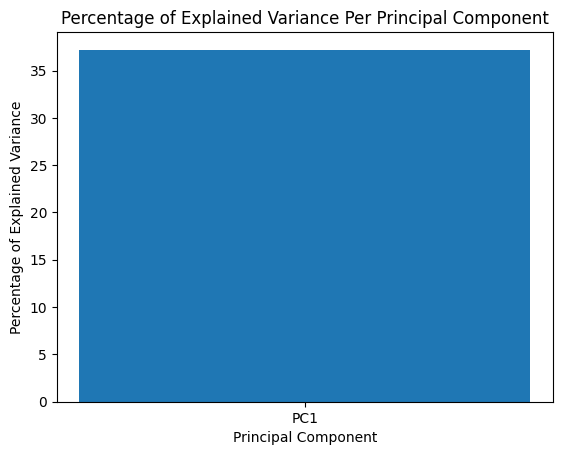

In [6]:
# making PCA plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Percentage of Explained Variance Per Principal Component')
plt.show()

In [7]:
# mine data for the past 10 years for diff sympathy trades
# according to this, i have my 3 most important factors
# which of these 100 othe stocks should i buy then to profit?
# pick stocks based off these factors now 
# simplifying how i pick the stocks now 
# stock 1: i know the values for my important features
# thru PCA i know which features are important and how important 
# multiply the eigen vector by the IRL values and choose the highest value 

In [8]:
PCA_1_vector 

array([ 0.65873254,  0.32400188, -0.67903919])

In [9]:
data_copy = pd.read_csv('feb_20_data.csv')
data_copy.dropna()

,Stock,Open / Prev Close,daily vol / 10 day average vol,close / vwap
0,MRVL,1.011839,1.165785,0.996931
1,TSM,1.012447,1.019505,0.999961
2,AVGO,1.007590,1.121130,0.999678
3,MPWR,1.010782,0.988699,0.998866
4,AMD,1.032893,1.154134,1.003586
...,...,...,...,...
56,LEDS,1.129252,0.793878,1.010362
57,MRAM,0.998847,1.144824,1.003961
58,POET,1.000000,1.421500,1.002070
59,QUIK,0.993002,1.019084,1.028638


In [10]:
scalar_values = {}

for index, row in data_copy.iterrows():
    vector = np.array(row[1:], dtype=float)  
    scalar_value = np.dot(vector, PCA_1_vector)
    scalar_values[row['Stock']] = scalar_value
    
# organize in ascending ordr
sorted_scalars = sorted(scalar_values.items(), key=lambda x: x[1], reverse=True)

for stock, scalar in sorted_scalars:
    print(f"{stock}: {scalar}")

PRSO: 0.5885420783683942
SQNS: 0.5232298209854603
POET: 0.4388560591693018
SIMO: 0.43280040416975785
GFS: 0.43019249772569146
WOLF: 0.4216425263126522
GSIT: 0.4073271446821769
EMKR: 0.4033346087431663
AIP: 0.40114880811563425
AMD: 0.3728671508925303
MRVL: 0.36729249322817237
IMOS: 0.36488558271489646
STM: 0.35247200422062475
AVGO: 0.34816048103439223
NXPI: 0.347661579711656
MRAM: 0.3471691124840739
POWI: 0.34643235638239933
AOSL: 0.3458922022083055
LAES: 0.3425464897694378
SYNA: 0.34036278410919063
SWKS: 0.3399207576262624
QRVO: 0.335508860070604
MU: 0.3335982392638873
CEVA: 0.3296044263586422
MTSI: 0.32876153012202747
TSEM: 0.3236575196588195
TXN: 0.3210276527470918
TSM: 0.3182406985424189
SMTC: 0.31756201878303836
NVEC: 0.31655260502651117
LEDS: 0.31501714448620166
ARM: 0.30950812046741083
MPWR: 0.30790630757020365
SITM: 0.30543856853418927
SGH: 0.3044913838026242
RMBS: 0.3035228143093651
INTC: 0.3023303714131226
MCHP: 0.3013388305423317
ALGM: 0.301257307267325
VLN: 0.300666240463988

In [11]:
def add_one_day(date):
    next_day = date + timedelta(days=1)
    return next_day

date = datetime.strptime("2024-02-20", "%Y-%m-%d")
end_date = add_one_day(date)

print("Start date:", date)
print("End date:", end_date)

Start date: 2024-02-20 00:00:00
End date: 2024-02-21 00:00:00


In [12]:

API_KEY = "tn4NSpJrJycbY85Tn2rUcuEo_JER8jqR"

def get_stock_data(ticker, beg_date, end_date):
    URL =  'https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/day/{beg_date}/{end_date}?adjusted=true&sort=asc&limit=120&apiKey={API_KEY}'.format(ticker=ticker, beg_date=beg_date, end_date=end_date, API_KEY=API_KEY)
    response = r.get(URL)
    response_json = response.json()  # Convert response to JSON
    print(response_json)  # Print response JSON to inspect its structure
 
# Call the function to fetch stock data
get_stock_data('NVDA', date, end_date)


ConnectionError: HTTPSConnectionPool(host='api.polygon.io', port=443): Max retries exceeded with url: /v2/aggs/ticker/NVDA/range/1/day/2024-02-20%2000:00:00/2024-02-21%2000:00:00?adjusted=true&sort=asc&limit=120&apiKey=tn4NSpJrJycbY85Tn2rUcuEo_JER8jqR (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000021415139250>: Failed to resolve 'api.polygon.io' ([Errno 11001] getaddrinfo failed)"))

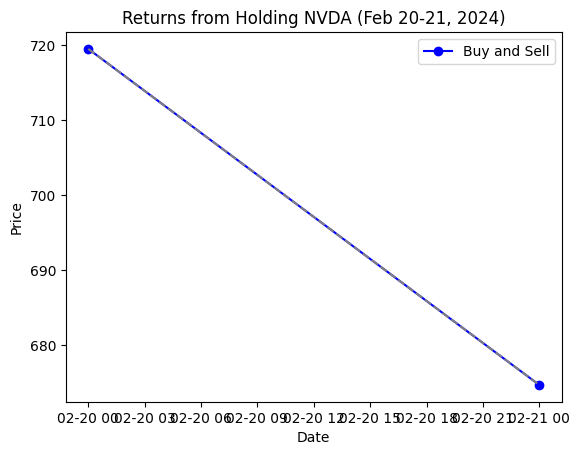

Buy Price: 719.47
Sell Price: 674.72
Returns: -6.21985628309728


In [ ]:
import requests as r
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

API_KEY = "tn4NSpJrJycbY85Tn2rUcuEo_JER8jqR"

def get_stock_data(ticker, beg_date, end_date):
    # Format dates as YYYY-MM-DD strings
    beg_date_str = beg_date.strftime("%Y-%m-%d")
    end_date_str = end_date.strftime("%Y-%m-%d")
    
    URL =  f'https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/day/{beg_date_str}/{end_date_str}?adjusted=true&sort=asc&limit=120&apiKey={API_KEY}'
    response = r.get(URL)
    response_json = response.json()  # Convert response to JSON
    
    # Extract data from response JSON and return DataFrame
    data = response_json['results']
    df = pd.DataFrame(data)
    df['t'] = pd.to_datetime(df['t'], unit='ms')  # Convert timestamp to datetime
    df.set_index('t', inplace=True)
    return df

# Define function to add one day to a given date
def add_one_day(date):
    next_day = date + timedelta(days=1)
    return next_day

# Define start and end dates
start_date = datetime.strptime("2024-02-20", "%Y-%m-%d")
end_date = add_one_day(start_date)

# Fetch stock data for NVDA from Polygon.io
nvda_data = get_stock_data('NVDA', start_date, end_date)

# Calculate returns
buy_price = nvda_data['o'].iloc[0]  # Buy price (open price on start date)
sell_price = nvda_data['c'].iloc[-1]  # Sell price (close price on end date)
returns = (sell_price - buy_price) / buy_price * 100

# Plot NVDA returns
plt.plot([start_date, end_date], [buy_price, sell_price], marker='o', color='blue', label='Buy and Sell')
plt.plot([start_date, end_date], [buy_price, sell_price], linestyle='--', color='gray')
plt.title('Returns from Holding NVDA (Feb 20-21, 2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

print("Buy Price:", buy_price)
print("Sell Price:", sell_price)
print("Returns:", returns)


In [ ]:

API_KEY = "tn4NSpJrJycbY85Tn2rUcuEo_JER8jqR"

def get_stock_data(ticker, beg_date, end_date):
        URL =  'https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/day/{beg_date}/{end_date}?adjusted=true&sort=asc&limit=120&apiKey={API_KEY}'.format(ticker = ticker, beg_date = date, end_date = add_one_day(date), API_KEY = API_KEY)
        response = r.get(URL)
        data = response.json()['results']
        df = pd.DataFrame(data)
        df['t'] = pd.to_datetime(df['t'], unit='ms') - pd.Timedelta(hours=4)  # Convert to Eastern Time
        df.set_index('t', inplace=True)
        return df

# Fetch stock data for NVDA from Polygon.io
nvda_data = get_stock_data('NVDA', '2024-02-20', '2024-02-21')

# Calculate returns
nvda_start_price = nvda_data['c'].iloc[0]
nvda_returns = nvda_data['c'] / nvda_start_price * 100

# Plot NVDA returns
plt.plot(nvda_returns.index, nvda_returns, label='NVDA Returns', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.title('NVDA Returns')
plt.legend()

# Show plot
plt.show()


KeyError: 'results'

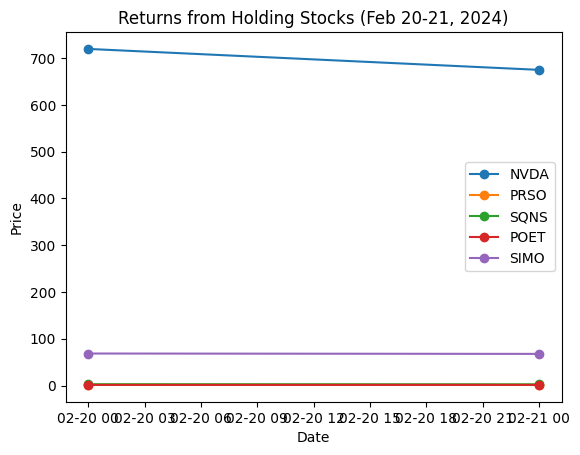

Returns for NVDA: -6.22%
Returns for PRSO: 2.34%
Returns for SQNS: -9.41%
Returns for POET: -0.71%
Returns for SIMO: -1.15%


In [ ]:
import requests as r
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

API_KEY = "tn4NSpJrJycbY85Tn2rUcuEo_JER8jqR"

def get_stock_data(ticker, beg_date, end_date):
    # Format dates as YYYY-MM-DD strings
    beg_date_str = beg_date.strftime("%Y-%m-%d")
    end_date_str = end_date.strftime("%Y-%m-%d")
    
    URL =  f'https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/day/{beg_date_str}/{end_date_str}?adjusted=true&sort=asc&limit=120&apiKey={API_KEY}'
    response = r.get(URL)
    response_json = response.json()  # Convert response to JSON
    
    # Extract data from response JSON and return DataFrame
    data = response_json['results']
    df = pd.DataFrame(data)
    df['t'] = pd.to_datetime(df['t'], unit='ms')  # Convert timestamp to datetime
    df.set_index('t', inplace=True)
    return df

# Define function to add one day to a given date
def add_one_day(date):
    next_day = date + timedelta(days=1)
    return next_day

# Define start and end dates
start_date = datetime.strptime("2024-02-20", "%Y-%m-%d")
end_date = add_one_day(start_date)

# Fetch stock data for NVDA from Polygon.io
nvda_data = get_stock_data('NVDA', start_date, end_date)

# Fetch stock data for PRSO, SQNS, POET, and SIMO from Polygon.io
prso_data = get_stock_data('PRSO', start_date, end_date)
sqns_data = get_stock_data('SQNS', start_date, end_date)
poet_data = get_stock_data('POET', start_date, end_date)
simo_data = get_stock_data('SIMO', start_date, end_date)

# Calculate buy and sell prices for each stock
buy_prices = {
    'NVDA': nvda_data['o'].iloc[0],
    'PRSO': prso_data['o'].iloc[0],
    'SQNS': sqns_data['o'].iloc[0],
    'POET': poet_data['o'].iloc[0],
    'SIMO': simo_data['o'].iloc[0]
}

sell_prices = {
    'NVDA': nvda_data['c'].iloc[-1],
    'PRSO': prso_data['c'].iloc[-1],
    'SQNS': sqns_data['c'].iloc[-1],
    'POET': poet_data['c'].iloc[-1],
    'SIMO': simo_data['c'].iloc[-1]
}

# Calculate returns for each stock
returns = {ticker: (sell_prices[ticker] - buy_prices[ticker]) / buy_prices[ticker] * 100 for ticker in buy_prices}

# Plot buy and sell prices for each stock
plt.plot([start_date, end_date], [buy_prices['NVDA'], sell_prices['NVDA']], marker='o', label='NVDA')
plt.plot([start_date, end_date], [buy_prices['PRSO'], sell_prices['PRSO']], marker='o', label='PRSO')
plt.plot([start_date, end_date], [buy_prices['SQNS'], sell_prices['SQNS']], marker='o', label='SQNS')
plt.plot([start_date, end_date], [buy_prices['POET'], sell_prices['POET']], marker='o', label='POET')
plt.plot([start_date, end_date], [buy_prices['SIMO'], sell_prices['SIMO']], marker='o', label='SIMO')

plt.title('Returns from Holding Stocks (Feb 20-21, 2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Print returns for each stock
for ticker, ret in returns.items():
    print(f"Returns for {ticker}: {ret:.2f}%")
